# Proje Açıklaması ve Adımlar

Bu projede, futbol takımlarının performansını analiz etmek ve görselleştirmek amacıyla çeşitli makine öğrenmesi teknikleri kullanılmıştır. Özellikle Türkiye'nin gol atma ve gol yeme performansı, diğer ülkelerle karşılaştırılarak değerlendirilecektir. Aşağıda proje kapsamında yapılacak işlemler ve izlenecek adımlar açıklanmıştır.

## 1. Veri Hazırlığı

Veri kümesi, futbol takımlarının performans metriklerini içermektedir. Aşağıdaki adımları takip ederek veri hazırlığı yapılacaktır:

- **Veri Yükleme**: Performans verilerini içeren veri kümesi yüklenir.
- **Veri Temizleme**: Eksik veya hatalı veriler temizlenir ve gerekli ön işlemler yapılır. (eksik veri yok.)
- **Veriyi anlama**: Veriyi anlmaya yönelik bazı paremetreleri görselleştirme.

## 2. Performans Analizi

Türkiye'nin performansı, diğer ülkelerle kıyaslanarak analiz edilecektir:

- **Ortalama Hesaplama**: Türkiye'nin ve tüm ülkelerin ortalama gol atma ve gol yeme verileri hesaplanır.
- **Performans Karşılaştırması**: Türkiye'nin performansı ortalama değerlerle karşılaştırılarak değerlendirilir.

## 3. Görselleştirme

Türkiye'nin performansını ve tüm ülkelerin ortalamasını kıyaslamak için aşağıdaki görselleştirmeler yapılacaktır:

- **Bar Grafiği**: Türkiye'nin gol atma ve gol yeme performansı, tüm ülkelerin ortalaması ile kıyaslanarak bar grafiği şeklinde gösterilecektir.

## 4. Performans İyileştirme Önerileri

Analiz sonuçlarına dayanarak performans iyileştirme önerileri sunulacaktır:

- **Gol Atma Stratejileri**: Türkiye'nin gol atma stratejilerinin gözden geçirilmesi ve hücum gücünün artırılması önerilecektir.
- **Savunma Stratejileri**: Türkiye'nin savunma stratejilerinin iyileştirilmesi ve defans oyuncularının performansının artırılması önerilecektir.

## 5. Sonuçların Sunumu

Sonuçlar, grafikler ve önerilerle birlikte sunulacaktır. Performans değerlendirmeleri ve iyileştirme önerileri, ilgili görselleştirmelerle desteklenerek açıklanacaktır.

veri seti linki:
    https://www.kaggle.com/datasets/biswasahana/uefa-euro-2024

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Veri setini yükleme

df = pd.read_csv(r"C:\Users\realb\Desktop\euro 2024\veri seti\UEFA Euro 2024 - Goals Stats.csv")

### Veri setini anlama

In [3]:
df.head()

,Team,Group,Matches Played,Won,Drawn,Lost,Total Goals,Right Foot Goals,Left Foot Goals,Head Goals,Other Goals,Goals Inside Area,Goals Outside Area,Penalties Scored
0,Albania,B,3,0,1,2,3,1,1,1,0,3,0,0
1,Austria,D,4,2,0,2,7,3,1,2,0,6,0,1
2,Belgium,E,4,1,1,2,2,2,0,0,0,1,1,0
3,Croatia,B,3,0,2,1,3,1,1,0,0,2,0,0
4,Czechia,F,3,0,1,2,3,2,0,0,1,2,1,0


In [4]:
df.tail()

,Team,Group,Matches Played,Won,Drawn,Lost,Total Goals,Right Foot Goals,Left Foot Goals,Head Goals,Other Goals,Goals Inside Area,Goals Outside Area,Penalties Scored
19,Slovenia,C,4,0,4,0,2,1,1,0,0,1,1,0
20,Spain,B,6,6,0,0,13,4,6,2,0,11,1,0
21,Switzerland,A,5,2,3,0,8,6,2,0,0,6,2,0
22,Turkiye,F,5,3,0,2,8,4,2,2,0,6,2,0
23,Ukraine,E,3,1,1,1,2,1,1,0,0,2,0,0


In [5]:
df.shape

(24, 14)

In [6]:
df.dtypes

Team                  object
Group                 object
Matches Played         int64
Won                    int64
Drawn                  int64
Lost                   int64
Total Goals            int64
Right Foot Goals       int64
Left Foot Goals        int64
Head Goals             int64
Other Goals            int64
Goals Inside Area      int64
Goals Outside Area     int64
Penalties Scored       int64
dtype: object

In [7]:
df.isnull().sum()

Team                  0
Group                 0
Matches Played        0
Won                   0
Drawn                 0
Lost                  0
Total Goals           0
Right Foot Goals      0
Left Foot Goals       0
Head Goals            0
Other Goals           0
Goals Inside Area     0
Goals Outside Area    0
Penalties Scored      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Team                24 non-null     object
 1   Group               24 non-null     object
 2   Matches Played      24 non-null     int64 
 3   Won                 24 non-null     int64 
 4   Drawn               24 non-null     int64 
 5   Lost                24 non-null     int64 
 6   Total Goals         24 non-null     int64 
 7   Right Foot Goals    24 non-null     int64 
 8   Left Foot Goals     24 non-null     int64 
 9   Head Goals          24 non-null     int64 
 10  Other Goals         24 non-null     int64 
 11  Goals Inside Area   24 non-null     int64 
 12  Goals Outside Area  24 non-null     int64 
 13  Penalties Scored    24 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 2.8+ KB


In [27]:
df.columns

Index(['Team', 'Group', 'Matches Played', 'Won ', 'Drawn', 'Lost',
       'Total Goals', 'Right Foot Goals', 'Left Foot Goals', 'Head Goals',
       'Other Goals', 'Goals Inside Area', 'Goals Outside Area',
       'Penalties Scored'],
      dtype='object')

### Veri görselleştirmesi yapma.

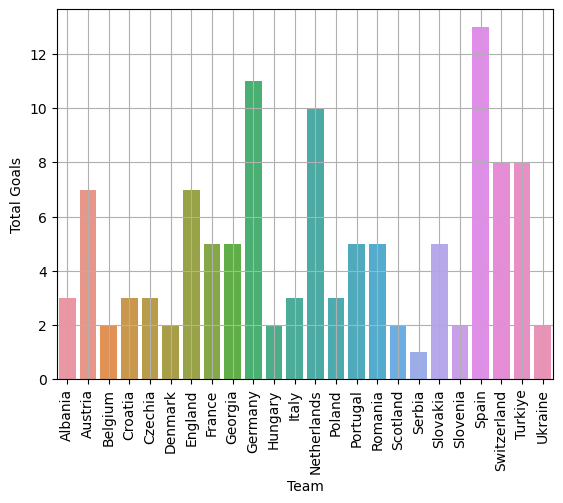

In [18]:
sns.barplot(x = "Team", y = "Total Goals", data = df);
plt.xticks(rotation = 90);
plt.grid(True);

#### Veri çaprazlama ile derinlik verme.

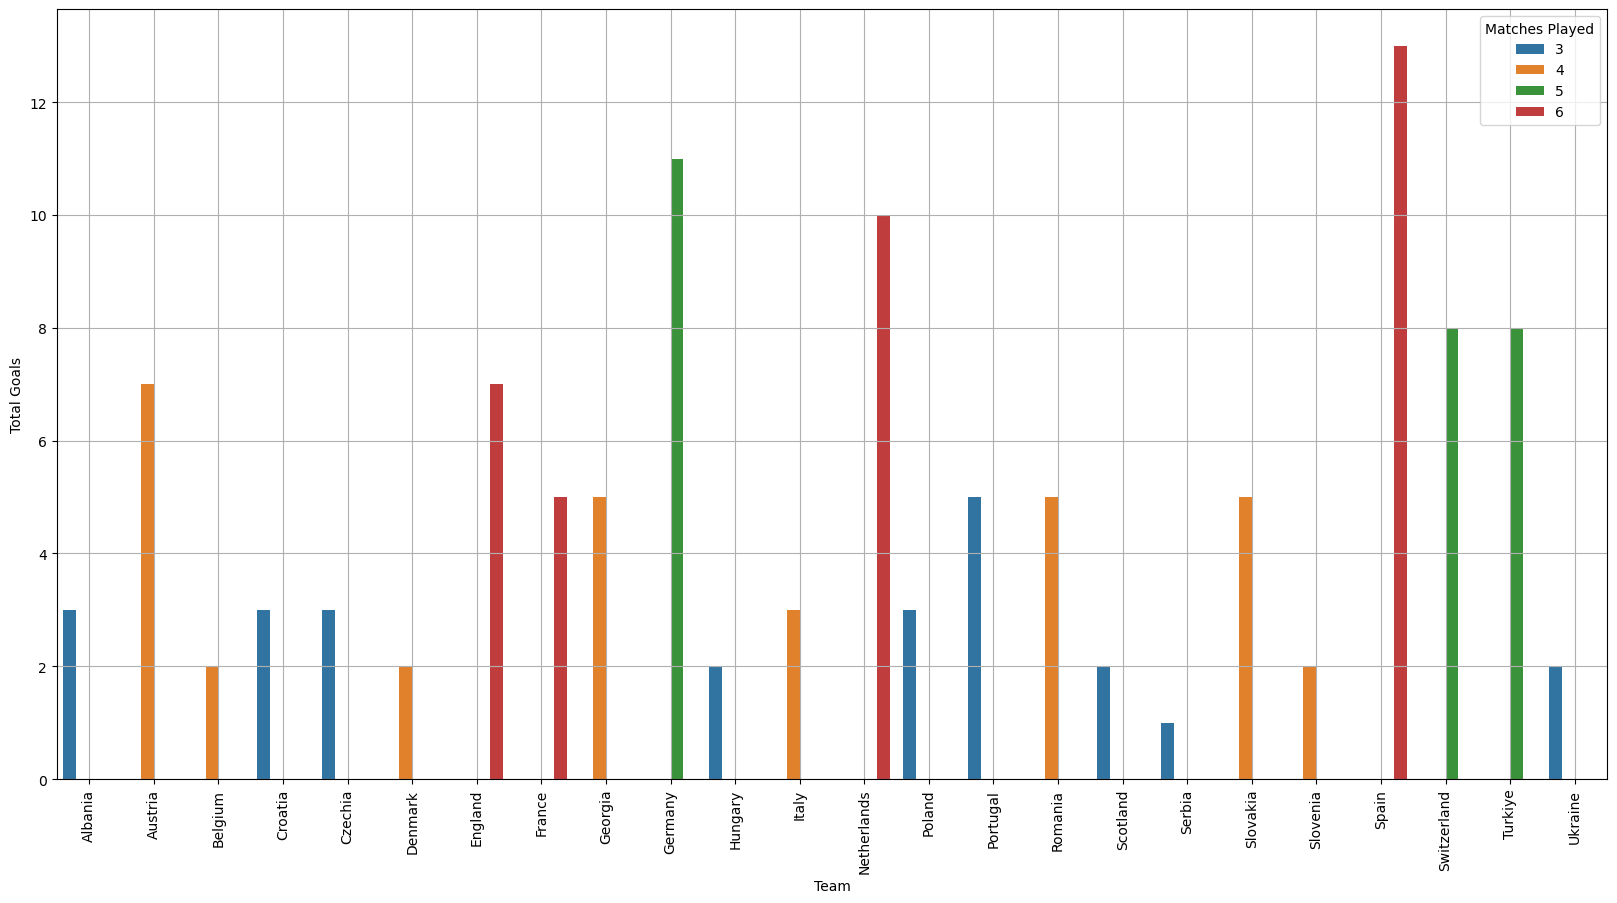

In [38]:
# Oynan maç sayısı

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Matches Played");
plt.xticks(rotation = 90);
plt.grid(True);

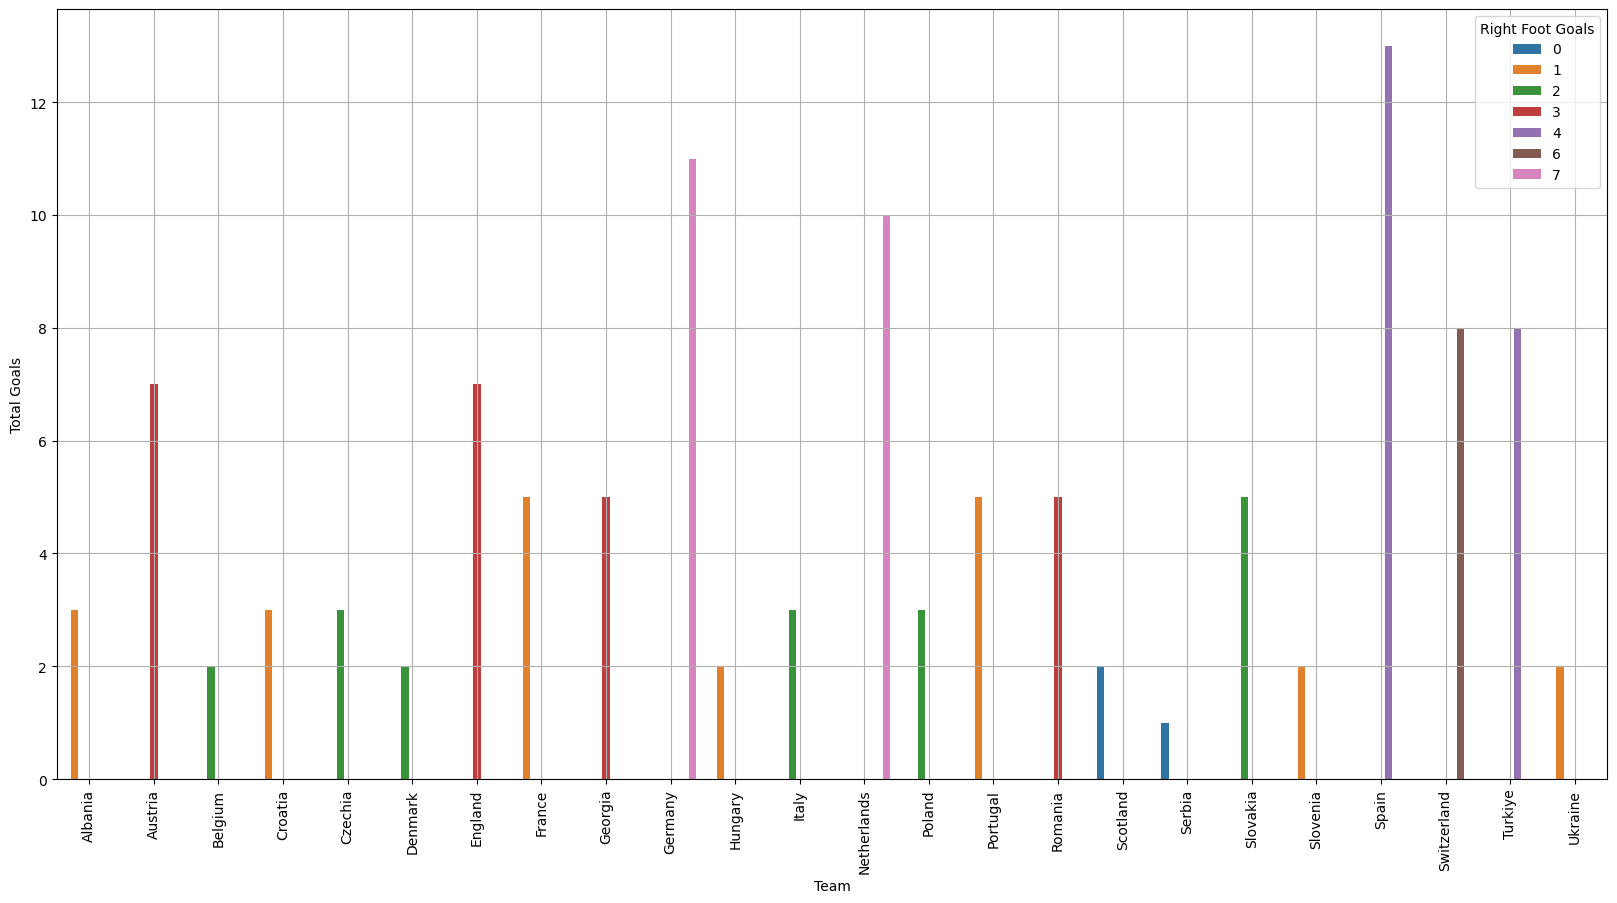

In [37]:
# Sağ ayakla atılan kod

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Right Foot Goals");
plt.xticks(rotation = 90);
plt.grid(True);

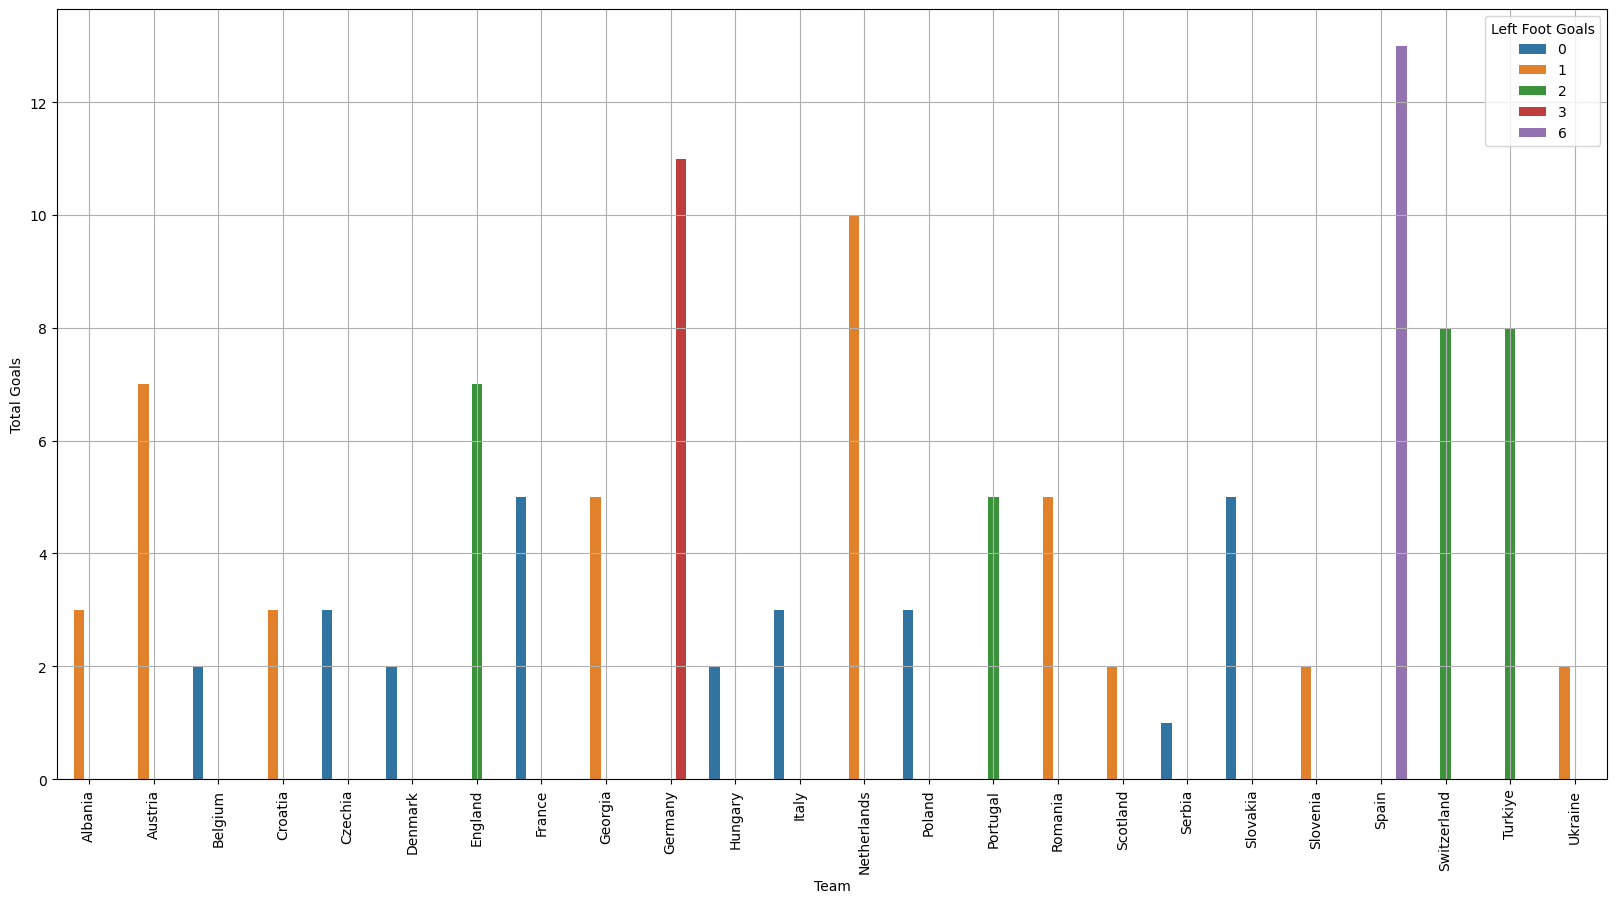

In [36]:
# Sol ayakla atılan gol

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Left Foot Goals");
plt.xticks(rotation = 90);
plt.grid(True);

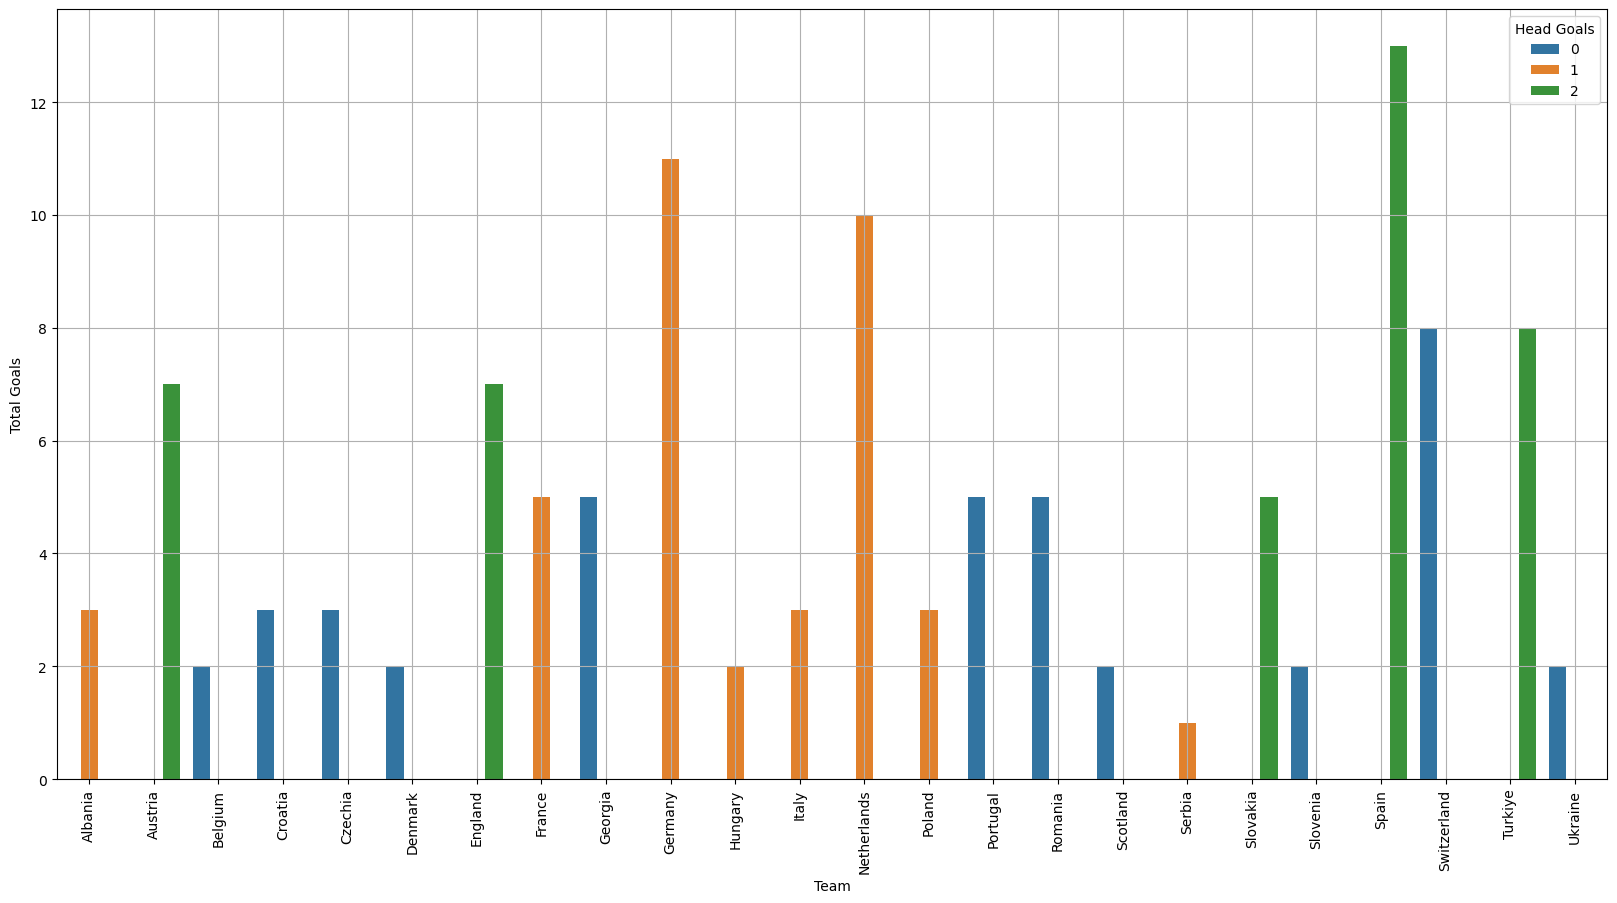

In [35]:
# kafa ile atılan gol

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Head Goals");
plt.xticks(rotation = 90);
plt.grid(True);

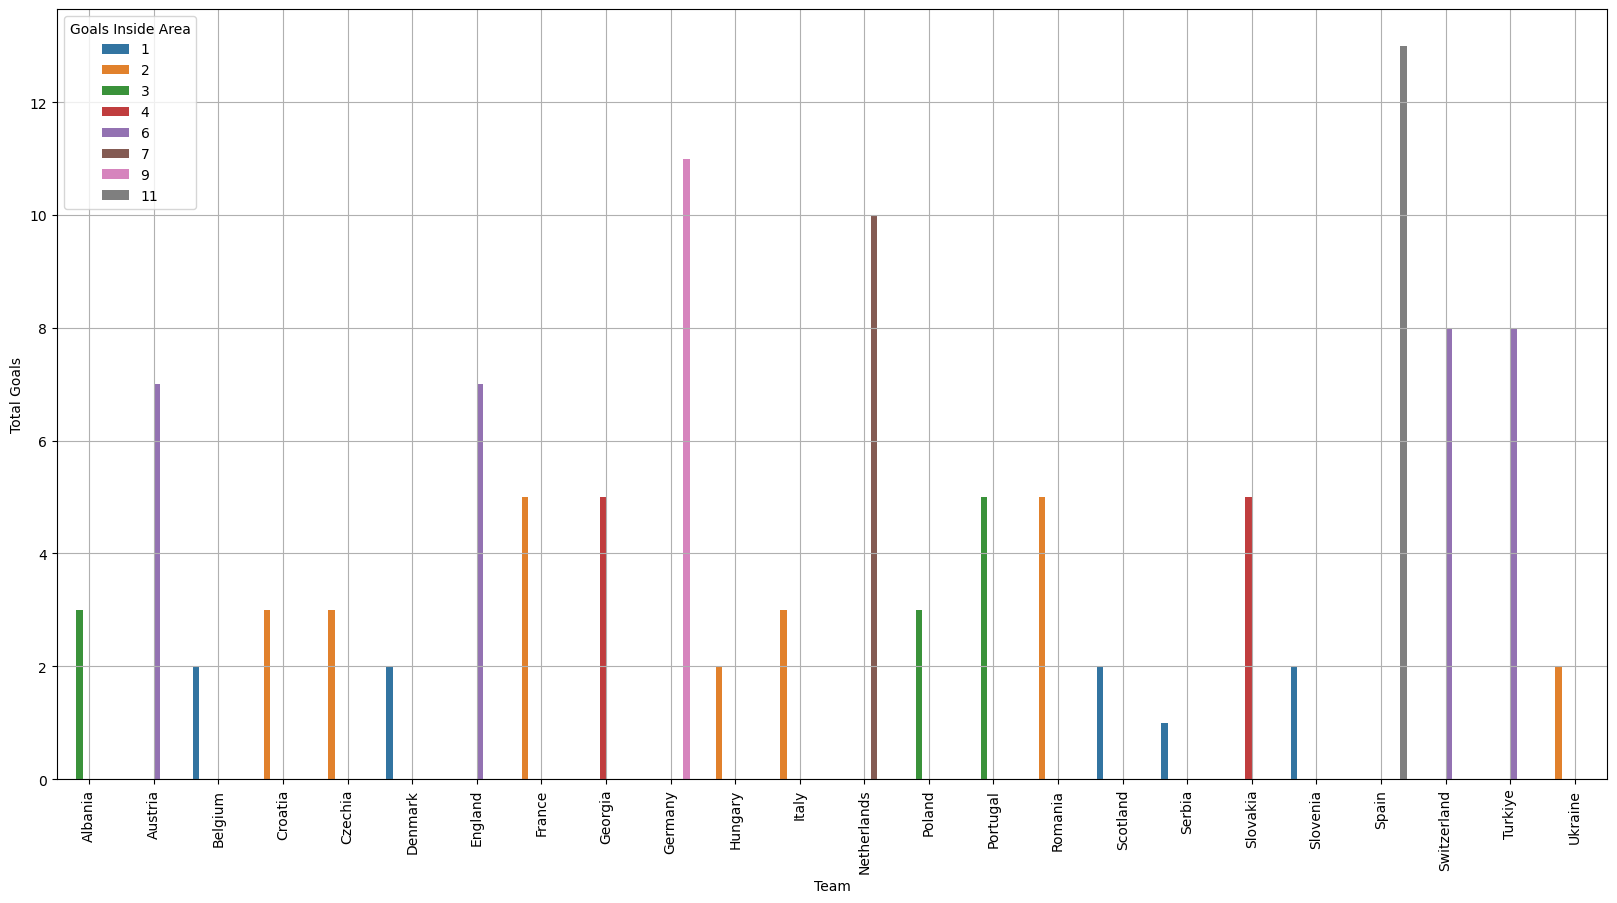

In [41]:
# Alan İçi Goller atılan gol (Ceza sahası)

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Goals Inside Area");
plt.xticks(rotation = 90);
plt.grid(True);

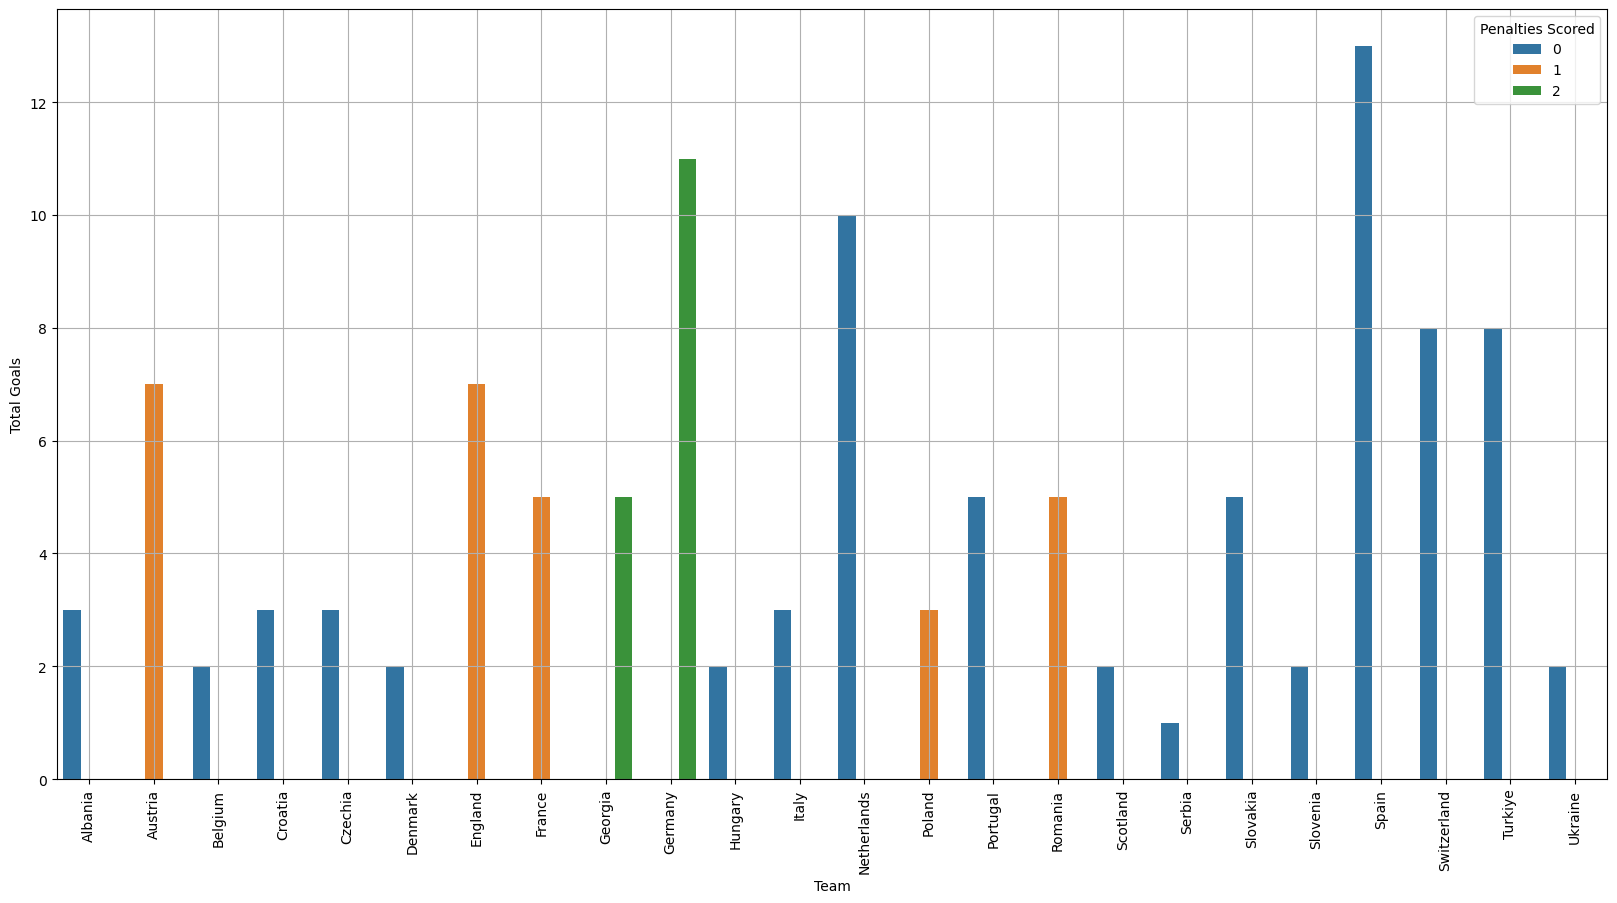

In [50]:
# Saha Dışındaki Goller atılan gol (Ceza dışı)

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Penalties Scored");
plt.xticks(rotation = 90);
plt.grid(True);

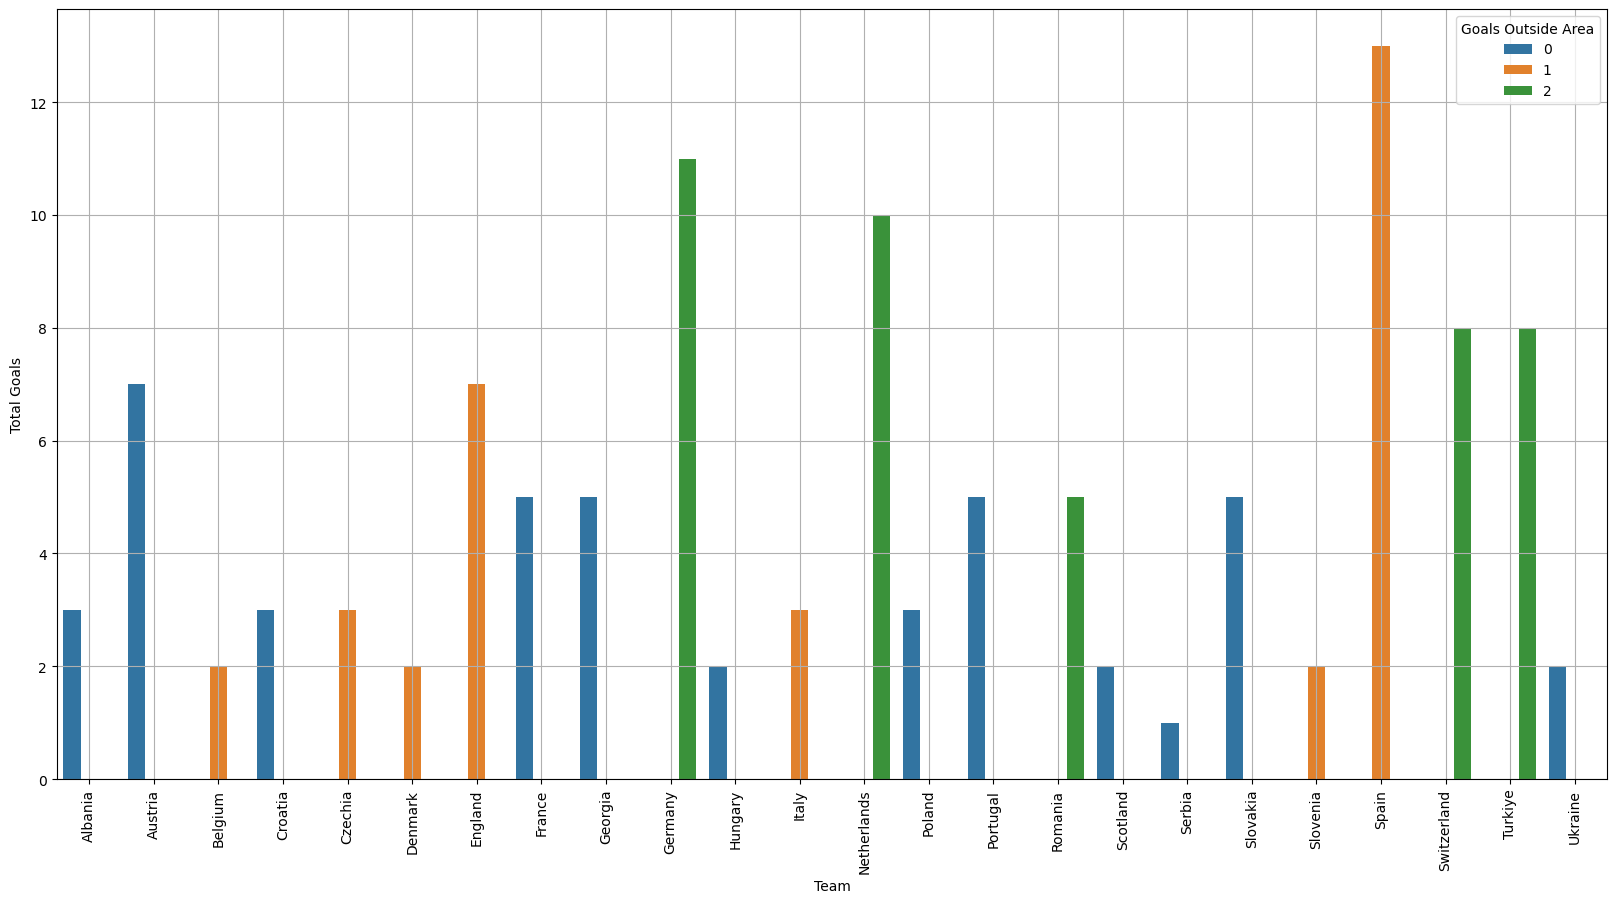

In [51]:
# Penaltıdan Goller atılan gol (Ceza dışı)

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Goals Outside Area");
plt.xticks(rotation = 90);
plt.grid(True);

Index(['Team', 'Group', 'Matches Played', 'Won', 'Drawn', 'Lost',
       'Total Goals', 'Right Foot Goals', 'Left Foot Goals', 'Head Goals',
       'Other Goals', 'Goals Inside Area', 'Goals Outside Area',
       'Penalties Scored'],
      dtype='object')


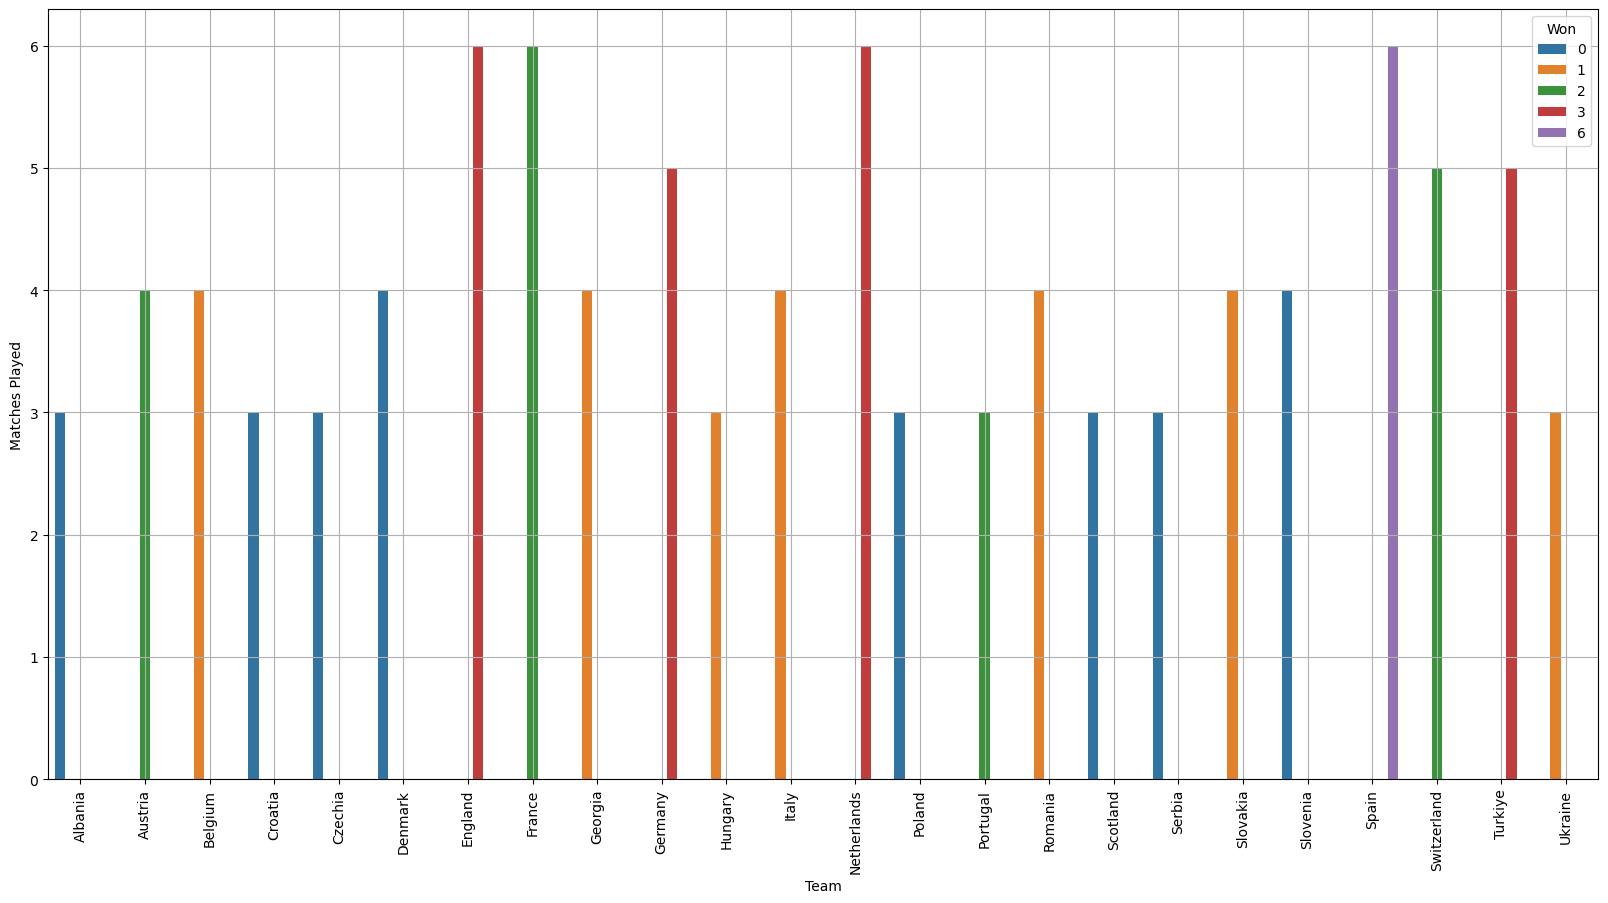

In [48]:
df.columns = df.columns.str.strip()

print(df.columns)

plt.figure(figsize=(20,10))
sns.barplot(x="Team", y="Matches Played", data=df, hue="Won")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

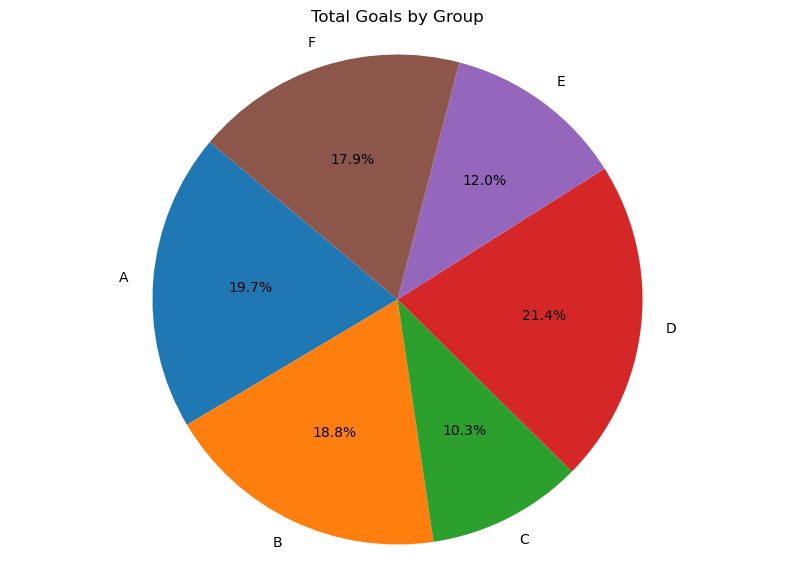

In [49]:
# Şimid hangi gruptaki ülke ne kadar gol atmış trnuva boyunca ona bakalım.

# 'Group' ve 'Total Goals' sütunları ile gruplama yaparak toplamları hesapla
grouped = df.groupby('Group')['Total Goals'].sum().reset_index()

# Pasta grafiğini oluştur
plt.figure(figsize=(10, 7))
plt.pie(grouped['Total Goals'], labels=grouped['Group'], autopct='%1.1f%%', startangle=140)
plt.title('Total Goals by Group')
plt.axis('equal')  # Daire şeklinde görselleştirme için
plt.show()

### Makine öğrenmesi modeli kurma

- Eğer tüm takımlar eşit maç oynasaydı.
- Yani tüm takımlar fianl oynayan takımlar kadar maç oynasa ona göre atılan gol ve yenilen gol sayısı.

In [63]:
# Ortalama maç sayısı
average_matches = df['Matches Played'].mean()

# Özellikler ve hedef değişkenler
X = df[['Matches Played']]
y_goals = df['Total Goals']
y_conceded = df['Matches Played'] - df['Won'] - df['Drawn']  # Bu örnekte gol yeme sayısını tahmin etmek için bir tahmini formül

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train_goals, y_test_goals = train_test_split(X, y_goals, test_size=0.2, random_state=42)
X_train, X_test, y_train_conceded, y_test_conceded = train_test_split(X, y_conceded, test_size=0.2, random_state=42)

# Model oluşturma
model_goals = LinearRegression()
model_conceded = LinearRegression()

# Modeli eğitme
model_goals.fit(X_train, y_train_goals)
model_conceded.fit(X_train, y_train_conceded)

# Tahmin yapma
df['Predicted Goals'] = model_goals.predict(df[['Matches Played']])
df['Predicted Conceded'] = model_conceded.predict(df[['Matches Played']])

# Eşit maç sayısına göre tahmin yapma (yeni DataFrame oluştur)
average_matches_df = pd.DataFrame({'Matches Played': [average_matches]})
predicted_goals_at_avg = model_goals.predict(average_matches_df)
predicted_conceded_at_avg = model_conceded.predict(average_matches_df)

# Eşit maç sayısına göre tahminleri tüm DataFrame'e ekleme
df['Predicted Goals at Average Matches'] = predicted_goals_at_avg[0]
df['Predicted Conceded at Average Matches'] = predicted_conceded_at_avg[0]

# Sonuçları gösterme
print(df[['Team', 'Predicted Goals', 'Predicted Conceded']])

           Team  Predicted Goals  Predicted Conceded
0       Albania         2.460251            1.269874
1       Austria         4.732218            1.133891
2       Belgium         4.732218            1.133891
3       Croatia         2.460251            1.269874
4       Czechia         2.460251            1.269874
5       Denmark         4.732218            1.133891
6       England         9.276151            0.861925
7        France         9.276151            0.861925
8       Georgia         4.732218            1.133891
9       Germany         7.004184            0.997908
10      Hungary         2.460251            1.269874
11        Italy         4.732218            1.133891
12  Netherlands         9.276151            0.861925
13       Poland         2.460251            1.269874
14     Portugal         2.460251            1.269874
15      Romania         4.732218            1.133891
16     Scotland         2.460251            1.269874
17       Serbia         2.460251            1.

### Kurulan mopdel sonrasında çıkan sonuçları görselleştirme.

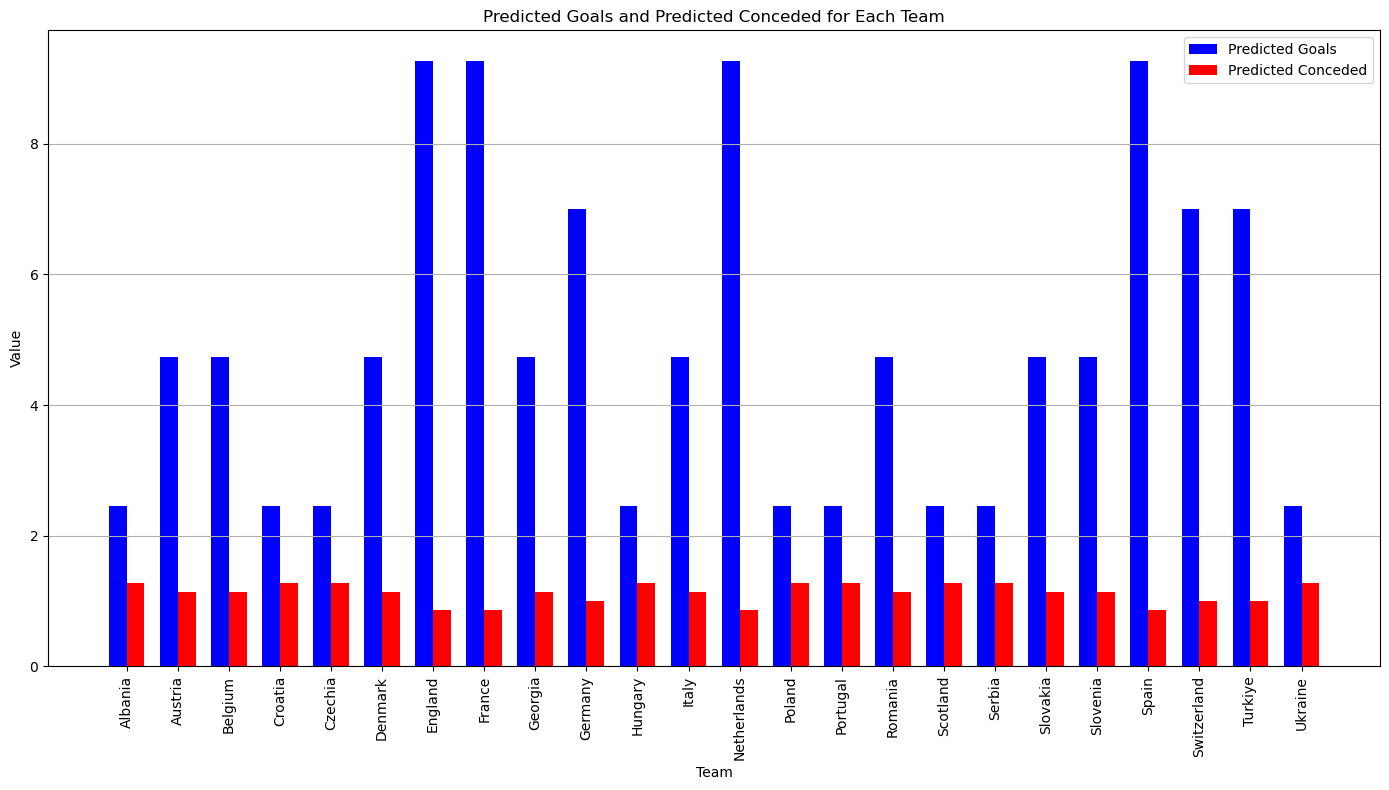

In [66]:
# Sütun grafiği oluşturma
plt.figure(figsize=(14, 8))

# Sütun genişliği
bar_width = 0.35
index = range(len(df))

# Predicted Goals ve Predicted Conceded sütunları
bar1 = plt.bar(index, df['Predicted Goals'], bar_width, label='Predicted Goals', color='b')
bar2 = plt.bar([i + bar_width for i in index], df['Predicted Conceded'], bar_width, label='Predicted Conceded', color='r')

# Eksen etiketleri ve başlık
plt.xlabel('Team')
plt.ylabel('Value')
plt.title('Predicted Goals and Predicted Conceded for Each Team')
plt.xticks([i + bar_width / 2 for i in index], df['Team'], rotation=90)
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

### Türkiye üzerine detaylı çalışma.

In [69]:
# Türkiye'nin verilerini çekme
turkey_data = df[df['Team'] == 'Turkiye']

# Türkiye'nin ortalama gol ve gol yeme verilerini alma
avg_goals_turkey = turkey_data['Predicted Goals'].values[0]
avg_conceded_turkey = turkey_data['Predicted Conceded'].values[0]

# Tüm ülkelerin ortalama gol ve gol yeme verilerini hesaplama
avg_goals_all = df['Predicted Goals'].mean()
avg_conceded_all = df['Predicted Conceded'].mean()

# Türkiye'nin performansını diğer ülkelerle karşılaştırma
print(f"Türkiye'nin Ortalama Gol Sayısı: {avg_goals_turkey}")
print(f"Türkiye'nin Ortalama Gol Yeme Sayısı: {avg_conceded_turkey}")
print(f"Tüm Ülkelerin Ortalama Gol Sayısı: {avg_goals_all}")
print(f"Tüm Ülkelerin Ortalama Gol Yeme Sayısı: {avg_conceded_all}")

# Türkiye'nin performansını değerlendirme
if avg_goals_turkey < avg_goals_all:
    print("Türkiye'nin daha fazla gol atması gerekiyor.")
else:
    print("Türkiye'nin gol atma performansı ortalamanın üzerinde.")

if avg_conceded_turkey > avg_conceded_all:
    print("Türkiye'nin daha az gol yemesi gerekiyor.")
else:
    print("Türkiye'nin gol yeme performansı ortalamanın altında.")

Türkiye'nin Ortalama Gol Sayısı: 7.004184
Türkiye'nin Ortalama Gol Yeme Sayısı: 0.997908
Tüm Ülkelerin Ortalama Gol Sayısı: 4.921548291666666
Tüm Ülkelerin Ortalama Gol Yeme Sayısı: 1.1225590833333332
Türkiye'nin gol atma performansı ortalamanın üzerinde.
Türkiye'nin gol yeme performansı ortalamanın altında.


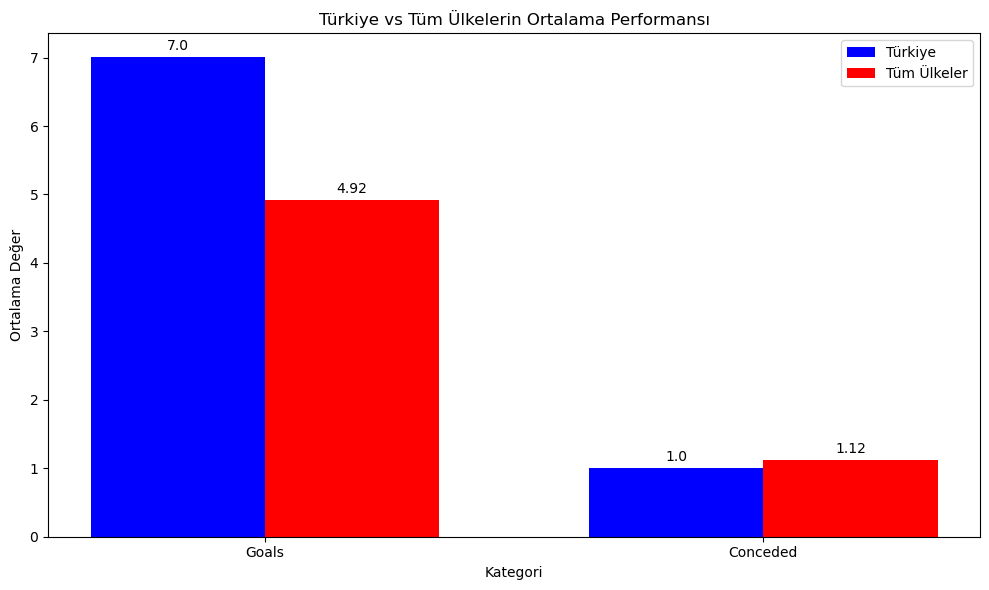

In [70]:
# Türkiye'nin ve tüm ülkelerin ortalama gol ve gol yeme verilerini tanımlama
categories = ['Goals', 'Conceded']
turkey_values = [avg_goals_turkey, avg_conceded_turkey]
average_values = [avg_goals_all, avg_conceded_all]

# Grafik boyutlarını belirleme
fig, ax = plt.subplots(figsize=(10, 6))

# Bar grafiklerini oluşturma
bar_width = 0.35
index = range(len(categories))

# Türkiye'nin performansı
bars1 = ax.bar(index, turkey_values, bar_width, label='Türkiye', color='b')

# Tüm ülkelerin ortalaması
bars2 = ax.bar([i + bar_width for i in index], average_values, bar_width, label='Tüm Ülkeler', color='r')

# Grafik etiketlerini ekleme
ax.set_xlabel('Kategori')
ax.set_ylabel('Ortalama Değer')
ax.set_title('Türkiye vs Tüm Ülkelerin Ortalama Performansı')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

# Grafik üzerine değerleri ekleme
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

# Grafiği gösterme
plt.tight_layout()
plt.show()

#### Türkiye'nin Performansı
- Ortalama Gol Sayısı: Türkiye'nin tahmin edilen gol sayısı 7.004, bu da diğer ülkelerden daha yüksek bir performansa işaret ediyor.
- Ortalama Gol Yeme Sayısı: Türkiye'nin tahmin edilen gol yeme sayısı 0.998, bu da diğer ülkelerden daha düşük bir performansı gösteriyor.
#### Türkiye'nin gol atma performansı ortalamanın üzerinde ve gol yeme performansı ortalamanın altında. Bu, Türkiye'nin hücum gücünün yüksek olduğunu ve savunmasının da oldukça etkili olduğunu gösteriyor.